In [0]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import pylab

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
import io
uploaded = files.upload()

Saving sample.csv to sample.csv


In [0]:
import io
data= pd.read_csv(io.BytesIO(uploaded['sample.csv']))

In [0]:
cols=list(data.columns)
cols

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

In [0]:
totalcols=len(cols)

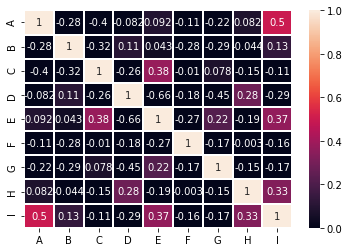

In [0]:
cor = data.iloc[:,0:totalcols].corr() # Total correleation function  corr is pearson function checking correlatino bew x-x only#
#cor = np.tril(cor,k=0)
sns.heatmap(cor, xticklabels=cols, yticklabels=cols,annot=True, linewidths=1, vmin=0,vmax=1,square=False)

In [0]:
cor

,A,B,C,D,E,F,G,H,I
A,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.217774,0.081946,0.497832
B,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.286277,-0.044246,0.134829
C,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.078053,-0.154371,-0.105755
D,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.451444,0.277618,-0.289633
E,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.217351,-0.192700,0.366079
F,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.169085,-0.003016,-0.164935
G,-0.217774,-0.286277,0.078053,-0.451444,0.217351,-0.169085,1.000000,-0.153582,-0.165829
H,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.153582,1.000000,0.328873
I,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.165829,0.328873,1.000000


In [0]:
type(cor)
cor.iloc[1:2,0:1]

,A
B,-0.275216


In [0]:
val = cor[cor.columns[2]].values[1]
val

-0.3235799005063856

In [0]:
G=nx.Graph()
rows=totalcols

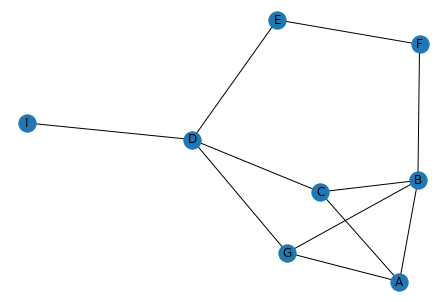

In [0]:
for i in range(0,rows):
  ls=[cor.columns[i]]
  for j in range(0,totalcols):
      if (cor[cor.columns[j]].values[i])<-0.2:
        ls.append(cor.columns[j])
  if len(ls)>1:
    for k in range(0,len(ls)):
      G.add_node(ls[k])
      G.add_edge(ls[0],ls[k])
nx.draw(G,with_labels=1)

In [0]:
lst=[]
for i in range(0,rows):
  #ls=[cor.columns[i]]
  for j in range(0,totalcols):
      if (cor[cor.columns[j]].values[i])<-0.2:
        lst.append(round(cor[cor.columns[j]].values[i],2))
lst=list(set(lst))
lst

[-0.28, -0.4, -0.32, -0.29, -0.22, -0.26, -0.66, -0.45, -0.27]

In [0]:
import numpy
from numpy import arange

In [0]:
lst2=[]
for i in arange(0.0,-180, -20):
  lst2.append(round(i,2))
lst2

[0.0, -20.0, -40.0, -60.0, -80.0, -100.0, -120.0, -140.0, -160.0]

In [0]:
df=pd.DataFrame({'X':lst2,'Y':lst})
df

,X,Y
0,0.0,-0.28
1,-20.0,-0.40
2,-40.0,-0.32
3,-60.0,-0.29
4,-80.0,-0.22
5,-100.0,-0.26
6,-120.0,-0.66
7,-140.0,-0.45
8,-160.0,-0.27


In [0]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labels=kmeans.predict(df)
centroids=kmeans.cluster_centers_

In [0]:
centroids

array([[ -20.        ,   -0.33333333],
       [-140.        ,   -0.46      ],
       [ -80.        ,   -0.25666667]])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

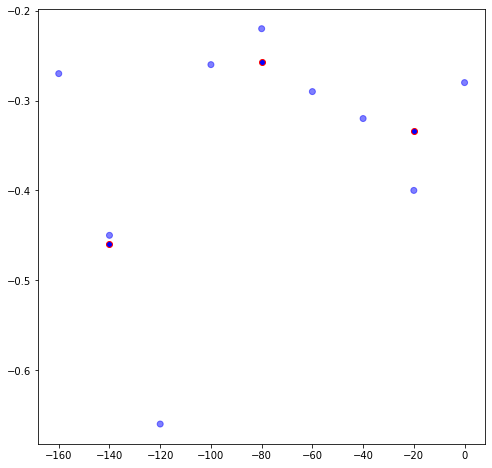

In [0]:
colmap={1:'b',2:'b',3:'b'}
fig=plt.figure(figsize=(8,8))
colors=map(lambda x:colmap[x+1],labels)
colors1=list(colors)
plt.scatter(df['X'],df['Y'],color=colors1,alpha=0.5,edgecolor=colors1)

for idx,centroid in enumerate(centroids):
  plt.scatter(*centroid,color=colmap[idx+1],alpha=1,edgecolor='r')
 
plt.show()

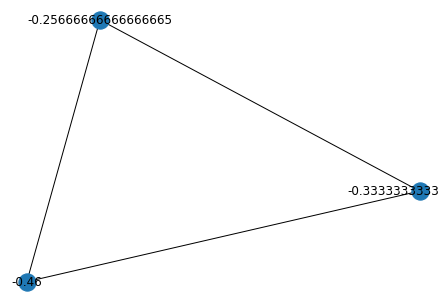

In [0]:
R=nx.Graph()
for j in range(0,len(centroids)-1):
  R.add_edge(centroids[j][1],centroids[j+1][1])
R.add_edge(centroids[0][1],centroids[len(centroids)-1][1])
nx.draw(R,with_labels=1)

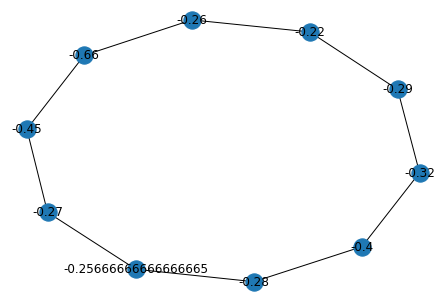

In [0]:
list1=[]
list1.append(centroids[0][1])
for j in range(0,len(lst)):
  list1.append(lst[j])
M=nx.Graph()
for j in range(0,len(list1)-1):
  M.add_edge(list1[j],list1[j+1])
M.add_edge(list1[0],list1[len(list1)-1])
nx.draw(M,with_labels=1)

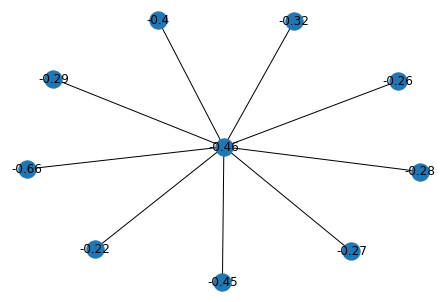

In [0]:
K=nx.Graph()
K.add_node(centroids[1][1])
for j in range(0,len(lst)):
  K.add_node(lst[j])
  K.add_edge(centroids[1][1],lst[j])
nx.draw(K,with_labels=1)